# Epanechnikov Approximate Inverse Function

In [1]:
import numpy as np
import time
import torch

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def chebyshev_basis(x, n):
    size = x.shape[0]
    x = x.reshape(-1, 1)
    x = 2 * x - 1
    if n == 0:
        return np.ones((size, 1))
    elif n == 1:
        return np.concatenate([np.ones((size, 1)), x], axis=1)
    basis = [np.ones((size, 1)), x]
    for i in range(2, n+1):
        t = 2*x*basis[i-1] - basis[i-2]
        basis.append(t)
    return np.concatenate(basis, axis=1)

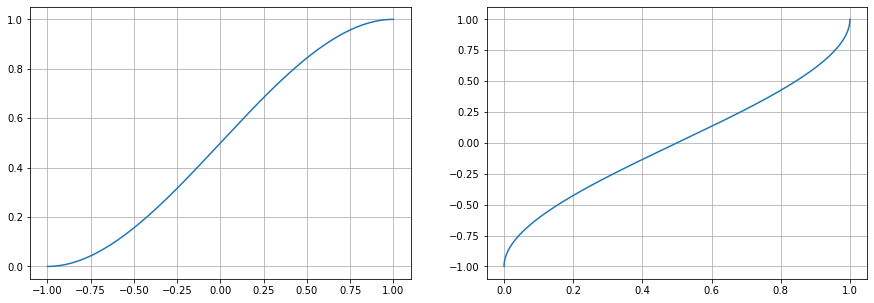

In [3]:
x = np.linspace(-1, 1, 1000)
f = 0.75 * x - 0.25 * x**3 + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(x, f);
ax1.grid(True);

ax2.plot(f, x);
ax2.grid(True);

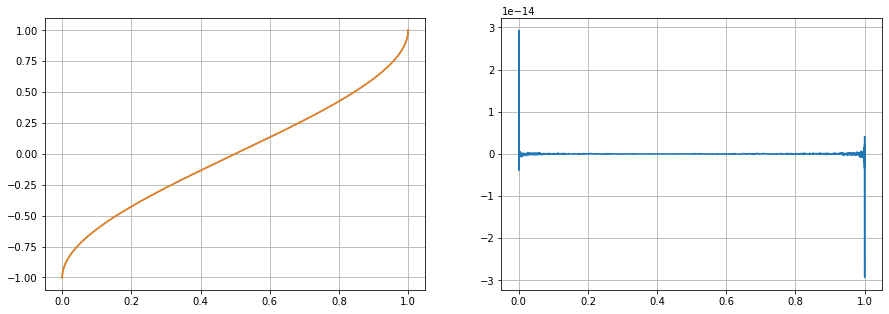

In [4]:
z = 2*np.sin(np.arcsin(2*f-1)/3)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(f, x);
ax1.plot(f, z);
ax1.grid(True);

ax2.plot(f, x - z);
ax2.grid(True);

[-0.13939626  1.13850401 -1.13850401]


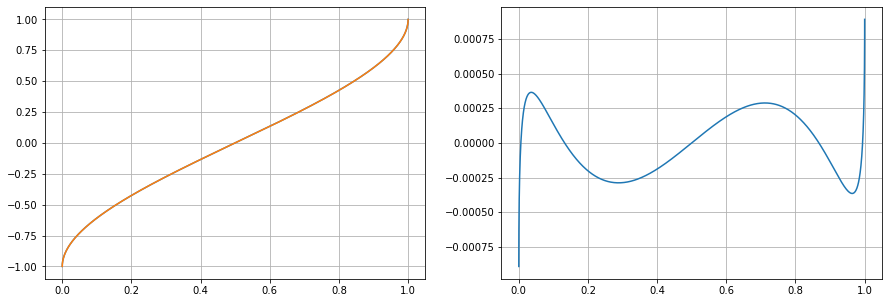

In [5]:
F = np.concatenate([2*f - 1, np.power(f, 1/2), np.power(1 - f, 1/2)])
# F = np.concatenate([2*f - 1, np.power(f, 1/2), np.power(1 - f, 1/2), np.power(f, 1/3), np.power(1 - f, 1/3)])

F = F.reshape((-1, f.shape[0])).T
beta = np.dot(np.linalg.inv(np.dot(F.T, F)), np.dot(F.T, x))
print(beta)

z = np.dot(F, beta)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(f, x);
ax1.plot(f, z);
ax1.grid(True);

ax2.plot(f, x - z);
ax2.grid(True);

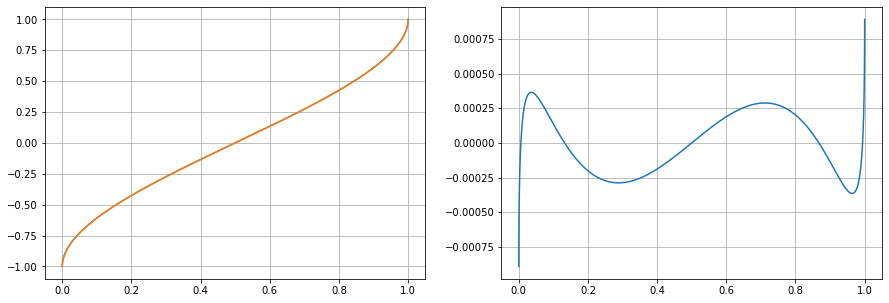

In [6]:
z = -0.13939626 * (2*f - 1) + 1.13850401 * (np.power(f, 1/2) - np.power(1 - f, 1/2))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(f, x);
ax1.plot(f, z);
ax1.grid(True);

ax2.plot(f, x - z);
ax2.grid(True);

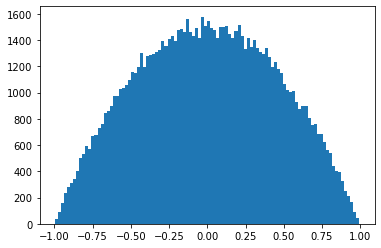

In [7]:
xi = np.random.uniform(size=100000)

z = -0.13939626 * (2*xi - 1) + 1.13850401 * (np.sqrt(xi) - np.sqrt(1 - xi))
# z = -0.1257388 * (2*xi - 1) + 1.10050917 * (np.sqrt(xi) - np.sqrt(1 - xi)) + 0.02606514 * (np.cbrt(xi) - np.cbrt(1 - xi))


plt.hist(z, bins=100);

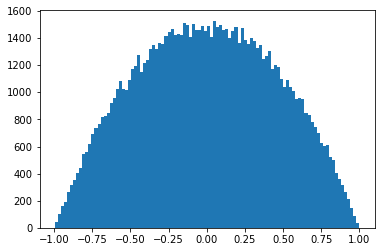

In [8]:
xi = np.random.uniform(size=100000)
z = 2*np.sin(np.arcsin(2*xi-1)/3)
plt.hist(z, bins=100);

In [9]:
# Скорость вычисления в numpy
xi = np.random.uniform(size=10000000)

st = time.time()
z2 = -0.13939626 * (2*xi - 1) + 1.13850401 * (np.sqrt(xi) - np.sqrt(1 - xi))
print(f'time z2: {time.time() - st} sec')

st = time.time()
z3 = -0.1257388 * (2*xi - 1) + 1.10050917 * (np.sqrt(xi) - np.sqrt(1 - xi)) \
     + 0.02606514 * (np.cbrt(xi) - np.cbrt(1 - xi))
print(f'time z3: {time.time() - st} sec')

st = time.time()
z = 2*np.sin(np.arcsin(2*xi-1)/3)
print(f'time z: {time.time() - st} sec')

time z2: 0.22298192977905273 sec
time z3: 1.2634389400482178 sec
time z: 0.6167128086090088 sec


In [10]:
# Скорость вычисления в torch
size = 10000000
xi = torch.rand((size, ))

C_0 = torch.tensor(-0.13939626)
C2_0 = 2. * C_0
C_1 = torch.tensor(1.13850401)

st = time.time()
# z2 = C_0 * (2.0 * xi - 1.0)  + C_1 * (torch.sqrt(xi) - torch.sqrt(1 - xi))
# memory allocation
z2 = torch.sqrt(xi) 
z2 -= torch.sqrt(1 - xi)
z2 *= C_1
z2 += C2_0 * xi 
z2 -= C_0
# z2 = C2_0 * xi - C_0 + (torch.sqrt(xi) - torch.sqrt(1 - xi)) * C_1

print(f'time z2: {time.time() - st} sec')


st = time.time()
z = 2 * torch.sin(torch.asin(2 * xi - 1) / 3)
print(f'time z: {time.time() - st} sec')

st = time.time()
z = torch.randn((size, ))
print(f'time randn: {time.time() - st} sec')

time z2: 0.09462451934814453 sec
time z: 0.1036379337310791 sec
time randn: 0.28409409523010254 sec
